# Kütüphanelerin Yüklenmesi



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Verilerin Yüklenmesi

In [ ]:
data = pd.read_csv('data/HR.csv')
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
data.isnull().sum() #null veri kontrolü


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

# Verilerin Yorumlanması ve Grafikler

In [ ]:
data.nunique() # sütunlardaki veri çeşitliliği


satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
sales                     10
salary                     3
dtype: int64

In [ ]:
data.salary.value_counts() #gelir dağılımı

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

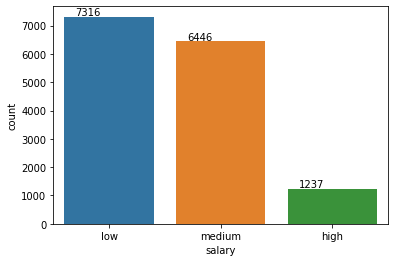

In [ ]:
ax = sns.countplot(x='salary',data=data) #gelir grafiği
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [ ]:
data.sales.value_counts() # departmanların çeşitleri ve sayısı



sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

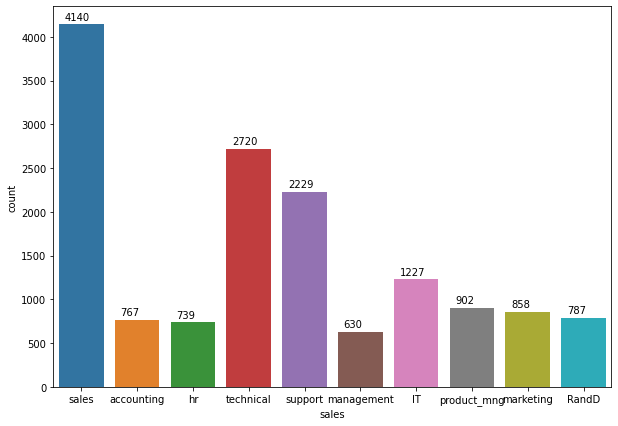

In [ ]:
# departman grafiği
plt.figure(figsize=(10,7))
ax = sns.countplot(x='sales',data=data)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

Text(0.5, 1.0, 'left or not left ')

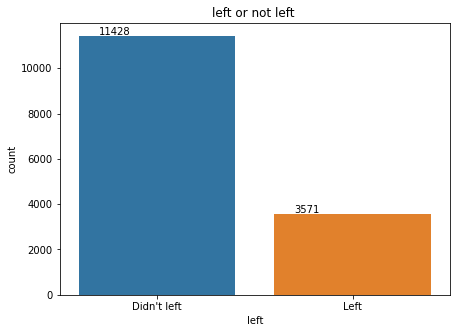

In [ ]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='left',data=data)
plt.xticks((0, 1), ["Didn't left", "Left"])
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.title('left or not left ')

In [ ]:
pd.crosstab(data.sales, data.left) #departmanlarda ayrılan ayrılmayan sayıları


left,0,1
sales,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


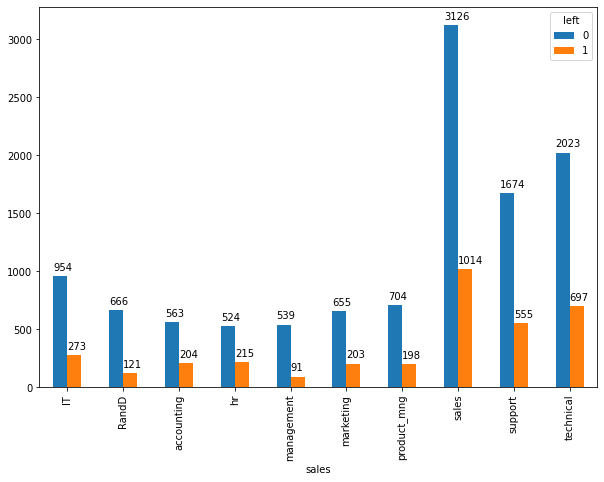

In [ ]:
ax = pd.crosstab(data.sales, data.left).plot(kind='bar', figsize=(10,7))
plt.xlabel('sales')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.001, p.get_height()+50))

In [ ]:
pd.crosstab(data.sales, data.promotion_last_5years) #son 5 yılda promosyon alan departmanların ayrılması


promotion_last_5years,0,1
sales,,
IT,1224,3
RandD,760,27
accounting,753,14
hr,724,15
management,561,69
marketing,815,43
product_mng,902,0
sales,4040,100
support,2209,20


In [ ]:
pd.crosstab(data.salary, data.promotion_last_5years) #son 5 yılda promosyon alanlrın maaşları


promotion_last_5years,0,1
salary,,
high,1165,72
low,7250,66
medium,6265,181


In [ ]:
pd.crosstab(data.time_spend_company, data.left) #ayrılma ve kaç yıldır çalıştıkları


left,0,1
time_spend_company,,
2,3191,53
3,4857,1586
4,1667,890
5,640,833
6,509,209
7,188,0
8,162,0
10,214,0


# Karar Ağacı Kullanılarak Model Geliştirilmesi

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
x = data.iloc[:,[0,1,2,3,4,5,7,8,9]] #bağımsız değişkenler
y = data.iloc[:,[6]] 

In [ ]:
#string kolonlara sayısal değer atama
label_encoder = preprocessing.LabelEncoder() 
x['sales']= label_encoder.fit_transform(data['sales'])
x['sales'].unique()
x['salary']= label_encoder.fit_transform(data['salary'])
x['salary'].unique()
x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,8,1
14995,0.37,0.48,2,160,3,0,0,8,1
14996,0.37,0.53,2,143,3,0,0,8,1
14997,0.11,0.96,6,280,4,0,0,8,1


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0) #eğitim ve test parçalarına bölüyoruz

In [ ]:
#karar ağacı oluşturma
d_tree1 = DecisionTreeClassifier(max_depth = 4)
d_tree1.fit(x_train, y_train)
y_pred = d_tree1.predict(x_test)
print("Başarı Oranı: ",metrics.accuracy_score(y_test, y_pred))

Başarı Oranı:  0.969


# Yapay Sinir Ağları Kullanılarak Model Geliştirilmesi






In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


In [ ]:
#ölçeklendirme
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
#yapay sinir ağı modelimizi oluştur, gizli katmanı yapılandır
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10, 10), max_iter=10000) #10ar düğümden oluşan 4 katlı katman ağı oluştur
mlp.fit(x_train, y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(10, 10, 10, 10), max_iter=10000)

In [ ]:
print(mlp.score(x_train, y_train))
print(mlp.score(x_test, y_test))


0.9768314026168847
0.9723333333333334


In [ ]:
#test verileri üzerinde tahminde bulunma 
predictions = mlp.predict(x_test)

In [ ]:
#oluşturduğumuz algoritmanın performansının ölçümlenmesi
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[2281   18]
 [  65  636]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2299
           1       0.97      0.91      0.94       701

    accuracy                           0.97      3000
   macro avg       0.97      0.95      0.96      3000
weighted avg       0.97      0.97      0.97      3000



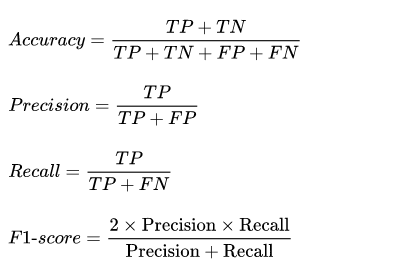

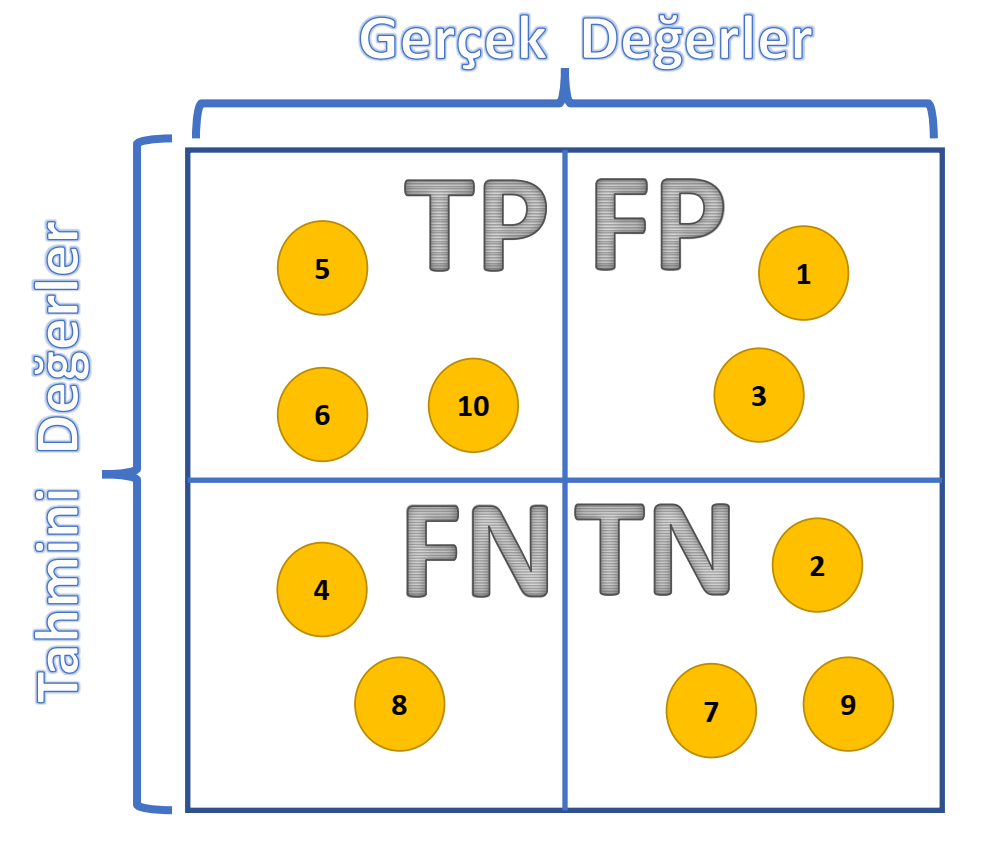

# deneme

In [ ]:
from collections import OrderedDict


In [ ]:
new_data = OrderedDict([
            ("satisfaction_level" , 0.5 ),
            ("last_evaluation" , 0.5 ),
            ("number_project" , 3 ),
            ("average_montly_hours" , 150 ),
            ("time_spend_company" , 5 ),
            ("Work_accident" , 0 ),
            ("promotion_last_5years" , 1 ),
            ("sales" , 1 ),
            ("salary " , 1 )]
)


In [ ]:
new_data = pd.Series(new_data).values.reshape(1,-1)

In [ ]:
predictions_new = model.predict(new_data)
predictions_new = np.argmax(new_data, axis=1)
y_pred = model.predict(new_data)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
y_pred

array([0])